WASTE MANAGEMENT USING CNN MODEL

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [3]:
train_path = "DATASET\TRAIN"
test_path = "DATASET\TEST"

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [5]:
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})


100%|██████████| 9999/9999 [00:15<00:00, 636.26it/s]


In [6]:
data.shape

(22564, 2)

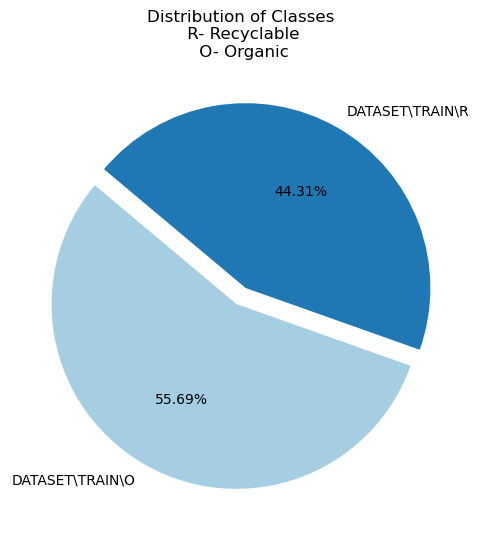

In [7]:
label_counts = data['label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    label_counts, 
    labels=label_counts.index, 
    autopct='%0.2f%%', 
    explode=[0.05] * len(label_counts),
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribution of Classes\n R- Recyclable\n O- Organic')
plt.show()

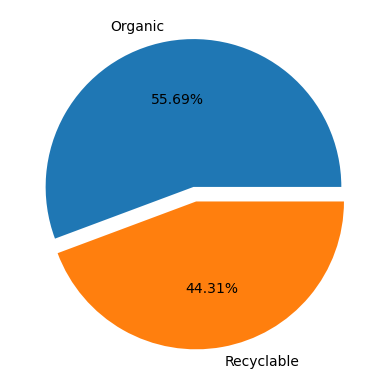

In [8]:
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'],autopct='%0.2f%%',explode=[0.05,0.05])
plt.show()

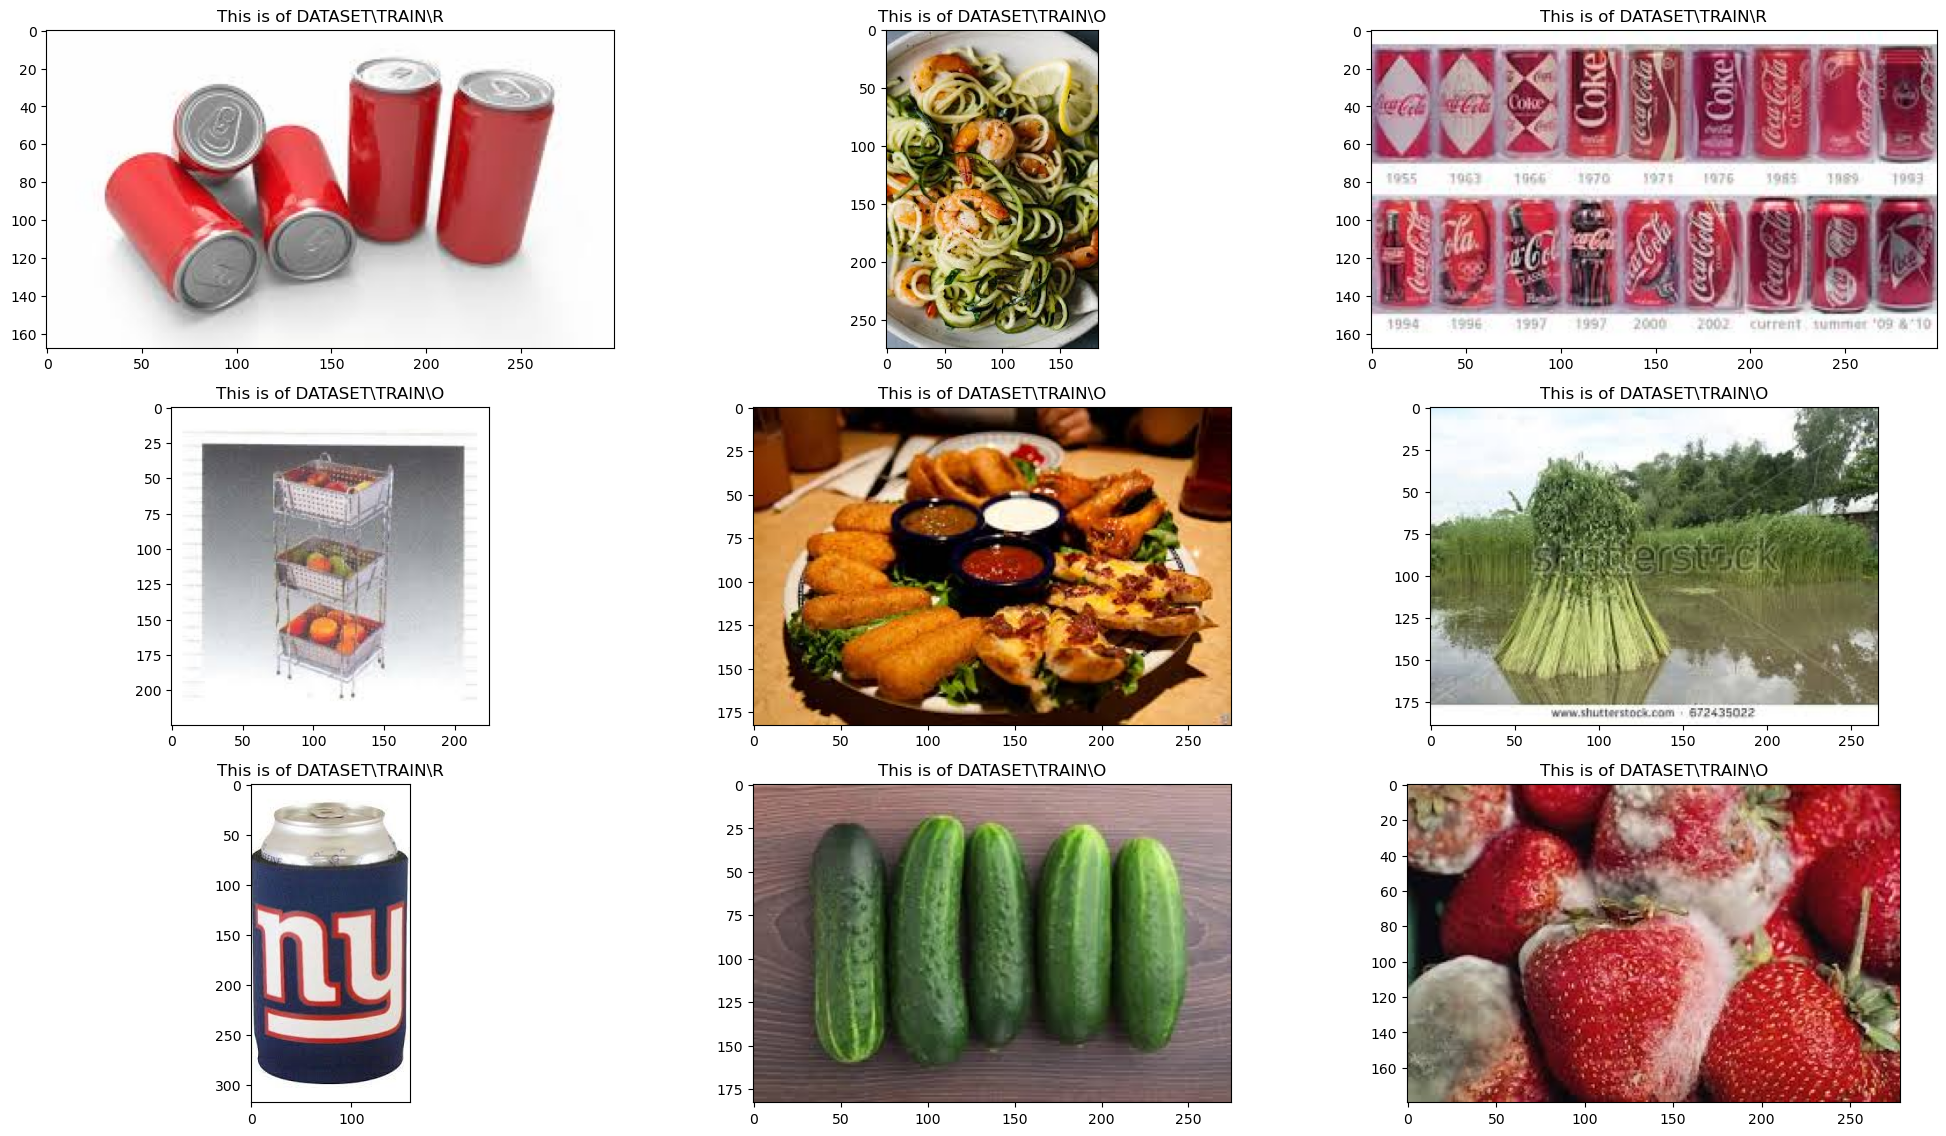

In [9]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()


In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,532,610 (24.92 MB)

 Trainable params: 6,532,610 (24.92 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (128, 128),  # Smaller image size
    batch_size = 64,  # Smaller batch size for quicker processing
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (128, 128),
    batch_size = 64,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [16]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator,
    callbacks=[early_stopping],  # Add EarlyStopping callback
    steps_per_epoch=train_generator.samples // 64,
    validation_steps=test_generator.samples // 64
)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 270s 758ms/step - accuracy: 0.7416 - loss: 0.5430 - val_accuracy: 0.7676 - val_loss: 0.4847
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.8438 - loss: 0.4161 - val_accuracy: 0.7059 - val_loss: 0.6312
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 316s 899ms/step - accuracy: 0.8157 - loss: 0.4373 - val_accuracy: 0.8482 - val_loss: 0.3646
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 251us/step - accuracy: 0.8750 - loss: 0.3005 - val_accuracy: 0.9412 - val_loss: 0.1851
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 331s 940ms/step - accuracy: 0.8287 - loss: 0.4037 - val_accuracy: 0.8682 - val_loss: 0.3349
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 259us/step - accuracy: 0.8438 - loss: 0.4947 - val_accuracy: 0.8824 - val_loss: 0.3296
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 282s 800ms/step - accuracy: 0.8328 - loss: 0.3990 - val_accuracy: 0.8265 - val_loss: 0.4019
